In [2]:
import os 
import sys 
import csv 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import sklearn 
import random

import MVTecAD_loaddata as mv

In [2]:
X_train, X_test, X_test_good, X_test_error, y_train, y_tg, y_te, y_test = mv.cable()

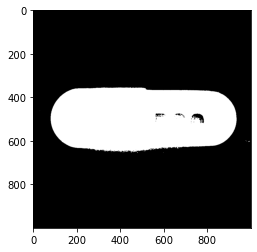

In [15]:
img = cv2.imread("capsule/train/good/000.png", cv2.IMREAD_GRAYSCALE)
img = 255-img
img_wb = np.where(img<128, 0, 255)
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(img_wb, cmap='gray')
img_contour = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# 輪郭内の非ゼロピクセルの座標を取得する
nonzero = np.where(img_wb==255)
# # 緑色チャネルの非ゼロピクセルのインデックスを取得する 
# x_coords = nonzero[0] 
# # # x座標の配列 
# y_coords = nonzero[1]

In [73]:
con = np.array(nonzero)
a, b = con.shape
d = random.randint(0,b-1)
w = con[:, d]


In [77]:
w

array([231, 755], dtype=int64)

In [64]:
a[:,9]

array([129, 649], dtype=int64)

In [16]:
def make_mask(name, X):
    for i in range(len(X)):
        img = cv2.imread(name+'/train/good/{0:03}.png'.format(i), cv2.IMREAD_GRAYSCALE)
        img = 255-img
        img_wb = np.where(img<128, 0, 255)
        nonzero = np.where(img_wb==255)
        con = np.array(nonzero)
        a, b = con.shape
        d = random.randint(0,b-1)
        w = con[:, d]
        rand_x = w[0]
        rand_y = w[1]
        x1, x2 = rand_x-60, rand_x+60
        y1, y2 = rand_y-60, rand_y+60
        img_mask = cv2.imread(name+'/train/good/{0:03}.png'.format(i))
        img_mask[x1:x2, y1:y2] = 255
        cv2.imwrite('fakes/'+name+'/'+str(i)+'.png',img_mask)

In [17]:
X_train, X_test, X_test_good, X_test_error, y_train, y_tg, y_te, y_test = mv.capsule()
make_mask('capsule', X_train)

# def fimage_bottle(X):
#     data = []
#     for i in range(len(X)):
#         img = cv2.imread('fakes/bottle/'+str(i)+'.png')
#         img = list(img)
#         data.append(img)
#     data = np.array(data)
#     return data

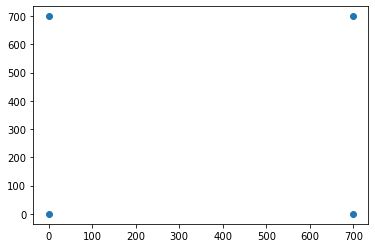

In [29]:
a = contours
rinkaku = a[:][:][0][:]
rinkaku = rinkaku.reshape(rinkaku.shape[0], 2)
plt.scatter(rinkaku[:, 0], rinkaku[:, 1])

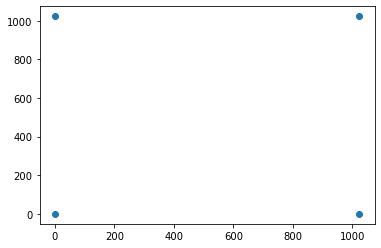

In [19]:
plt.scatter(rinkaku[:, 0], rinkaku[:, 1])

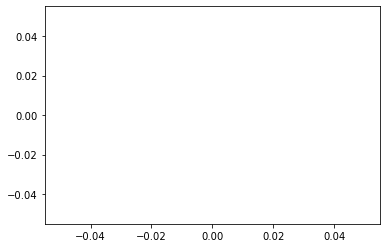

In [49]:
img = cv2.imread("screw/train/good/000.png", cv2.IMREAD_GRAYSCALE)
img=255-img
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
max_area = 0 
max_index = -1 
for i, contour in enumerate(contours): 
    area = cv2.contourArea(contour) 
    if area > max_area: 
        max_area = area
        max_index = i
max_contour = contours[max_index]

img_contour = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# グレースケール画像をカラー画像に変換する 
cv2.drawContours(img_contour, [max_contour], -1, (0, 255, 0), -1) # 緑色で輪郭を塗りつぶす

# 輪郭内の非ゼロピクセルの座標を取得する
nonzero = np.where(img_contour[:, :, 1]==0) 
# # 緑色チャネルの非ゼロピクセルのインデックスを取得する 
x_coords = nonzero[0] 
# # x座標の配列 
y_coords = nonzero[1]
# # y座標の配列
plt.scatter(x_coords, y_coords)
img[x_coords,y_coords] = 0

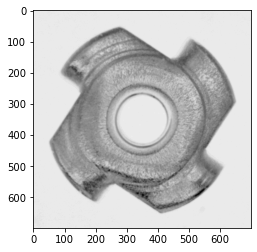

In [138]:
img = cv2.imread("metal_nut/train/good/000.png", cv2.IMREAD_GRAYSCALE)
img=255-img
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
plt.imshow(img, cmap='gray')
# 画像表示用に入力画像をカラーデータに変換する
img_disp = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# # 全ての輪郭を描画
# cv2.drawContours(img_disp, contours, -1, (0, 0, 255), 2)

(1, 2)


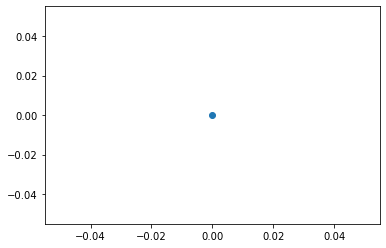

In [139]:
a = contours
rinkaku = a[0][:][0][:]
rinkaku = rinkaku.reshape(rinkaku.shape[0], 2)
print(rinkaku.shape)
plt.scatter(rinkaku[:, 0], rinkaku[:, 1])